# 超参选择与模型验证

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [7]:
from sklearn.cross_validation import train_test_split
xtr,xte,ytr,yte=train_test_split(X,y,random_state=0,train_size=0.7)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [9]:
model.fit(xtr,ytr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [10]:
from sklearn.metrics import accuracy_score
ypdt=model.predict(xte)
accuracy_score(yte,ypdt)

0.9777777777777777

In [14]:
from sklearn.cross_validation import cross_val_score
cross_val_score(model,X,y,cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.86666667,
       1.        , 0.86666667, 1.        , 1.        , 1.        ])

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))

In [17]:
import numpy as np
def make_data(N, err=1.0, rseed=1):
# 随机轴样数据
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y
X, y = make_data(40)

In [23]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # 设置图形样式

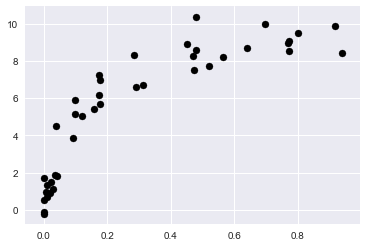

In [31]:
fig=plt.figure()
plt.scatter(X,y,color='black')

In [35]:
X_test = np.linspace(-0.1, 1.1, 500)[:, None]
X_test

array([[-1.00000000e-01],
       [-9.75951904e-02],
       [-9.51903808e-02],
       [-9.27855711e-02],
       [-9.03807615e-02],
       [-8.79759519e-02],
       [-8.55711423e-02],
       [-8.31663327e-02],
       [-8.07615230e-02],
       [-7.83567134e-02],
       [-7.59519038e-02],
       [-7.35470942e-02],
       [-7.11422846e-02],
       [-6.87374749e-02],
       [-6.63326653e-02],
       [-6.39278557e-02],
       [-6.15230461e-02],
       [-5.91182365e-02],
       [-5.67134269e-02],
       [-5.43086172e-02],
       [-5.19038076e-02],
       [-4.94989980e-02],
       [-4.70941884e-02],
       [-4.46893788e-02],
       [-4.22845691e-02],
       [-3.98797595e-02],
       [-3.74749499e-02],
       [-3.50701403e-02],
       [-3.26653307e-02],
       [-3.02605210e-02],
       [-2.78557114e-02],
       [-2.54509018e-02],
       [-2.30460922e-02],
       [-2.06412826e-02],
       [-1.82364729e-02],
       [-1.58316633e-02],
       [-1.34268537e-02],
       [-1.10220441e-02],
       [-8.6

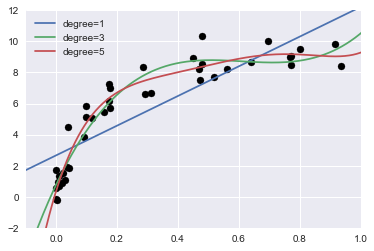

In [37]:
axis = plt.axis()
plt.scatter(X,y,color='black')
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test, y_test, label='degree={0}'.format(degree))
    plt.xlim(-0.1, 1.0)
    plt.ylim(-2, 12)
    plt.legend(loc='best');

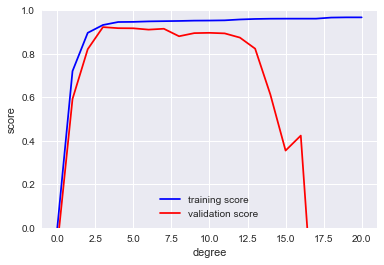

In [38]:
from sklearn.learning_curve import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,'polynomialfeatures__degree',degree, cv=7)
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

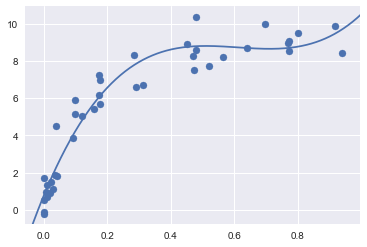

In [41]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);